In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
def van_der_pol(t, z):
    x, y = z
    dxdt = y
    dydt = -x + y * (1 - x**2)
    return [dxdt, dydt]

In [8]:
t_span = [0, 20]
z_initial = [2, 0]  # Initial conditions [x(0), y(0)]
sol = solve_ivp(van_der_pol, t_span, z_initial, t_eval=np.linspace(t_span[0], t_span[1], 1000))

In [22]:
x, y = np.meshgrid(np.linspace(-8, 8, 30), np.linspace(-8, 8, 30))

In [23]:
u, v = np.zeros(x.shape), np.zeros(y.shape)
for i in range(len(x)):
    for j in range(len(y)):
        z_temp = van_der_pol(0, [x[i, j], y[i, j]])
        u[i, j] = z_temp[0]
        v[i, j] = z_temp[1]

In [24]:
norm = np.sqrt(u**2 + v**2)
u /= norm
v /= norm

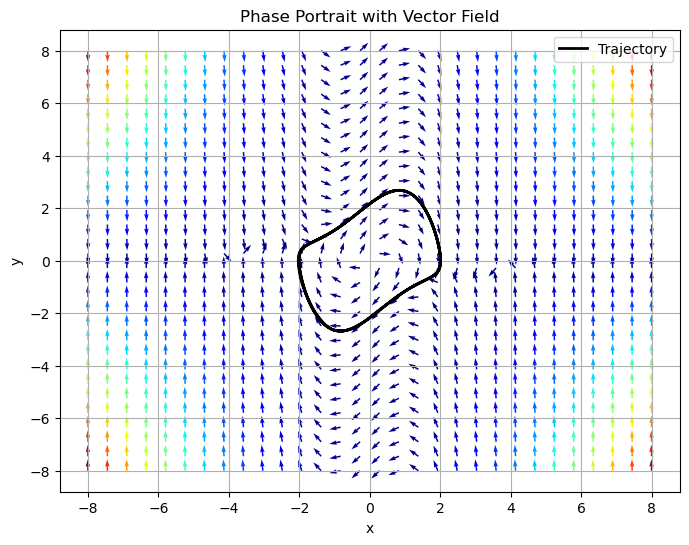

In [25]:
plt.figure(figsize=(8, 6))
plt.quiver(x, y, u, v, norm, cmap=plt.cm.jet)
plt.plot(sol.y[0], sol.y[1], 'k-', lw=2, label='Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait with Vector Field')
plt.legend()
plt.grid(True)
plt.show()